<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number!

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

## Creating some data to view and fit

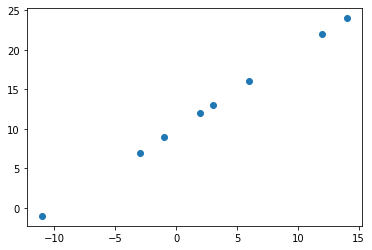

In [11]:
# Create feautures
# X = np.array([-11.0, -3.0, -1.0, 2.0, 3.0, 6.0, 12.0, 14.0, 18.0, 5.0, 123.0, 909.0, 523.0, 241.0, 233.0, 45.0, 64.0, 75.0, 453.0, 345.0, 654.0, 876.0])
X = np.array([-11.0, -3.0, -1.0, 2.0, 3.0, 6.0, 12.0, 14.0])

# Create labels
# y = np.array([-1.0, 7.0, 9.0, 12.0, 13.0, 16.0, 22.0, 24.0, 28.0, 15.0, 133.0, 919.0, 533.0, 251.0, 243.0, 55.0, 74.0, 85.0, 463.0, 355.0, 664.0, 886.0])
y = np.array([-1.0, 7.0, 9.0, 12.0, 13.0, 16.0, 22.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [12]:
# Create and demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [14]:
X[0].ndim

0

In [15]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input/output layers, as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function (the function which tells our model how wrong it is) and the optimiser (tells our model how improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns betveen X and y (features and labels)

In [22]:
# Set random seed
tf.random.set_seed(seed=42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # 1 - because we want input 1 number and predict 1 number
])

# 2. Compile the model  
model.compile(loss = tf.keras.losses.mae, # mae is short mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent (is an optimizer tells our neural network how it should improve)
              metrics=["mae"])
# loss - how wrong your model's predictions are compared to the truth labels (you want to minimise this)
# optimize - how your model should update its internal patterns to better predictions
# metrics - human interpretable values for how well your model is doing

# 3. Fit the model
model.fit(X, y, epochs = 5) # model will have epochs = 5 opportunities of going through X and y
# epochs - how many times the model will go through all of the training examples

Epoch 1/5


ValueError: ignored

In [20]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [21]:
# Try and make a prediction using model
y_pred = model.predict([32.0])
y_pred

# Bad results

ValueError: ignored

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function for perhaps the **learning rate** of the optimizatiion function
3. **Fitting a model**  - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs = 100)

In [ ]:
# Remind ourselves of the data
X, y

In [ ]:
# Let's see if our model's prediction has improved
model.predict([12.0]), model.predict([10.0]), model.predict([-32.0]), model.predict([132.0])

In [ ]:
# Let's try to do better

# 1. Create the model (this time with extra layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model (this time with another optimizer with changed learning_rate)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])
# Note: the learning rate is a most important hyper parameter of many different known networks.

# 3. Fit the model 
model.fit(X, y, epochs = 100)

In [ ]:
model.predict([12.0]), model.predict([10.0]), model.predict([-11.0]), model.predict([45.0])
#Thats better

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> 
evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation - there are 3 words you should memorize:

>"Visualise, visualise, visualise"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself. What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a modelline up against the ground truth (the original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

In [ ]:
# Make labels for the dataset
y = X + 10
y

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data. Typically 70-80 percent of the total avaliable data
* **Validation set** - the model gets tuned on this data. Typically 10-15 percent of the total avaliable data
* **Test set** - the model gets evaluated on this data to test what it has learned. Typically 10-15 percent of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

In [ ]:
# Split the data into train and test set
X_train = X[:40] # First 40 training samples (80% data)
y_train = y[:40]

X_test = X[40:] # Last 10 samples (20% data)
y_test = y[40:]

len(X_train), len(X_test)

### Visualizing the data 
Now we've got our data in training and test sets. Let's visualise it again

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at let's have a look at how to build a neural network for our data.

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
# let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model. Same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"), # input_shape=1 because we passing 1 number to predict 1 number
    tf.keras.layers.Dense(1, name="Output_layer")
], name="model_1")

# 2. Compile a model. Same as above
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [ ]:
model.summary()

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

https://deeplizard.com/learn/video/8d-9SnGt5E0

In [ ]:
# Let's fit a model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 for do it without many outputs

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).



In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

🔑**Note:** If you feel like You're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.



In [ ]:
# Let's create a plotting func
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in a res
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legent
  plt.legend();

In [ ]:
# plt.figure(figsize=(10, 7))
# # Plot training data in blue
# plt.scatter(X_test, y_pred, c="b", label="Predicted data")
# # Plot test data in green
# plt.scatter(X_test, y_test, c="g", label="Testing data")
# # Show a legend
# plt.legend()

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

In [ ]:
# Let's try to do better
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    # tf.keras.layers.Dense(100, input_shape=[1], name="Input_layer"), # With 100 units worse
    # tf.keras.layers.Dense(10, input_shape=[1], name="Second_layer"), # With second layer - pretty worst
    tf.keras.layers.Dense(1, name="Output_layer")
], name="model_2")

model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.015), # With Adam lr=0.015 - better
              metrics=["mae"])


In [ ]:
model_2.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 for do it without many outputs

In [ ]:
plot_model(model_2, show_shapes=True)

In [ ]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

In [ ]:
plot_predictions(predictions=y_pred_2)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions?". As a great starter metric for any regression problem 
( tf.keras.losses.MAE() & tf.metrics.mean_absolute_error() )
* MSE - mean squared error, "square the average errors". When larger errors are more significant than saller errors.
( tf.keras.losses.MSE() & tf.metrics.mean_squared_error() )
* Huber - Combination of MSE and MAE. Less sensitive to outliers than MSE
( tf.keras.losses.Huber() )

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

In [ ]:
# Calculate the mean ablolute error
tf.keras.losses.MAE(y_true = y_test, y_pred=tf.squeeze(y_pred)) # We need to squeeze because y_pred have 1 extra dimension (shape=(10, 1))

In [ ]:
 tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
tf.constant(y_test)

In [ ]:
tf.constant(y_pred)

In [ ]:
tf.squeeze(y_pred)

In [ ]:
# Calculate the mean square error
tf.keras.losses.MSE(y_true = y_test, y_pred=tf.squeeze(y_pred)) # We need to squeeze because y_pred have 1 extra dimension (shape=(10, 1))

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=y_pred)

In [ ]:
mae

In [ ]:
mse